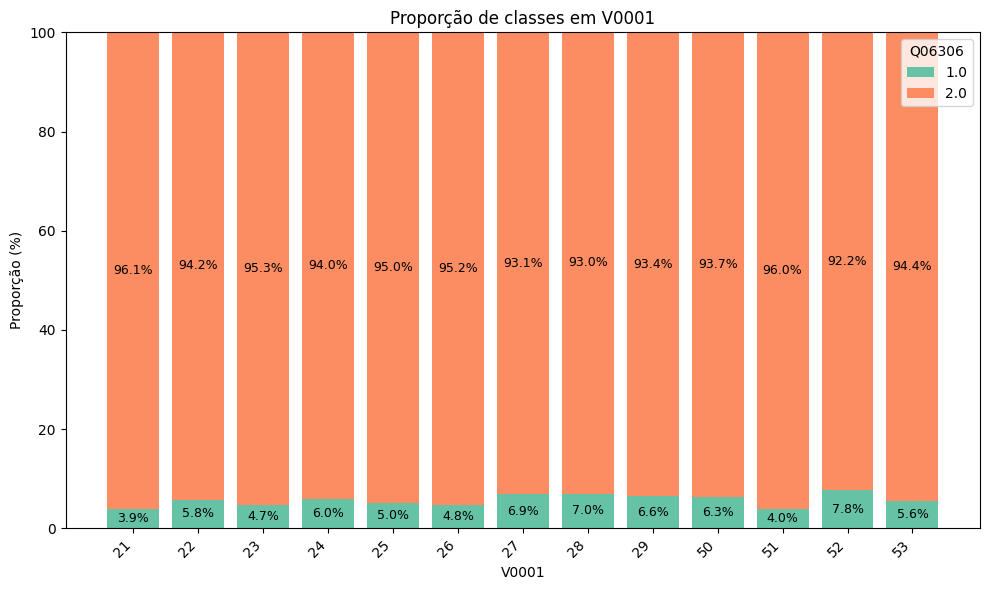

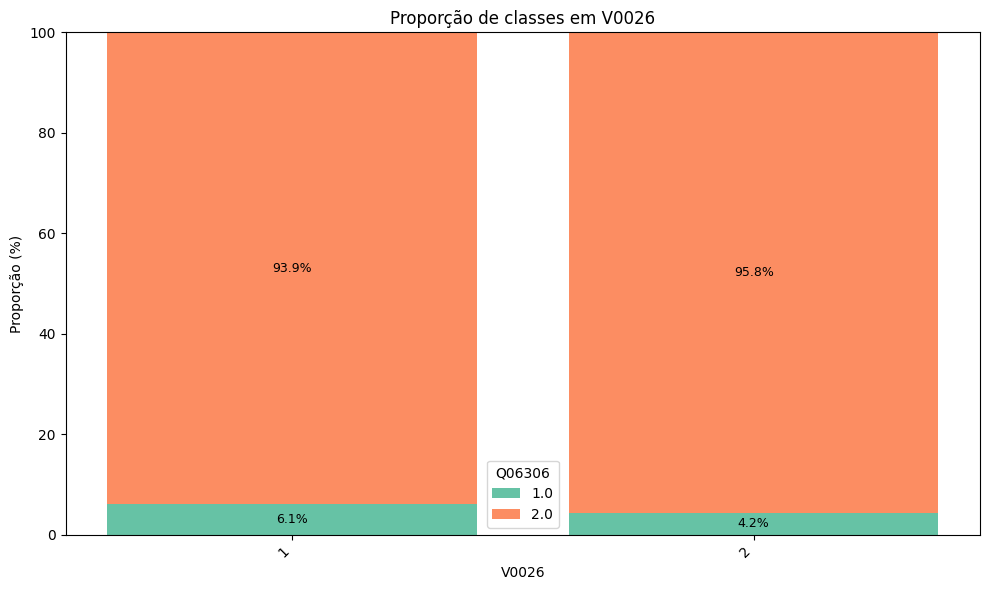

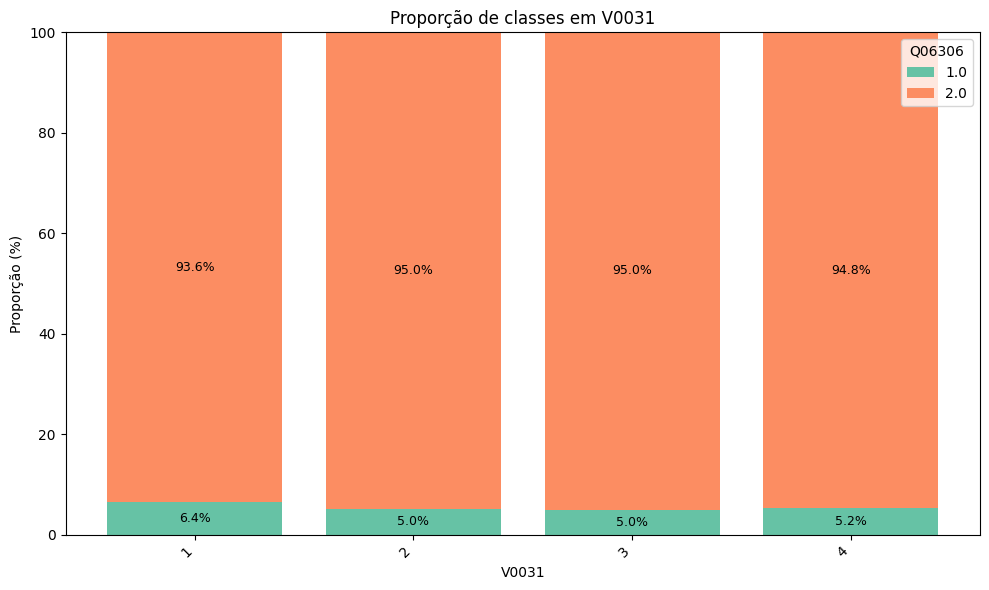

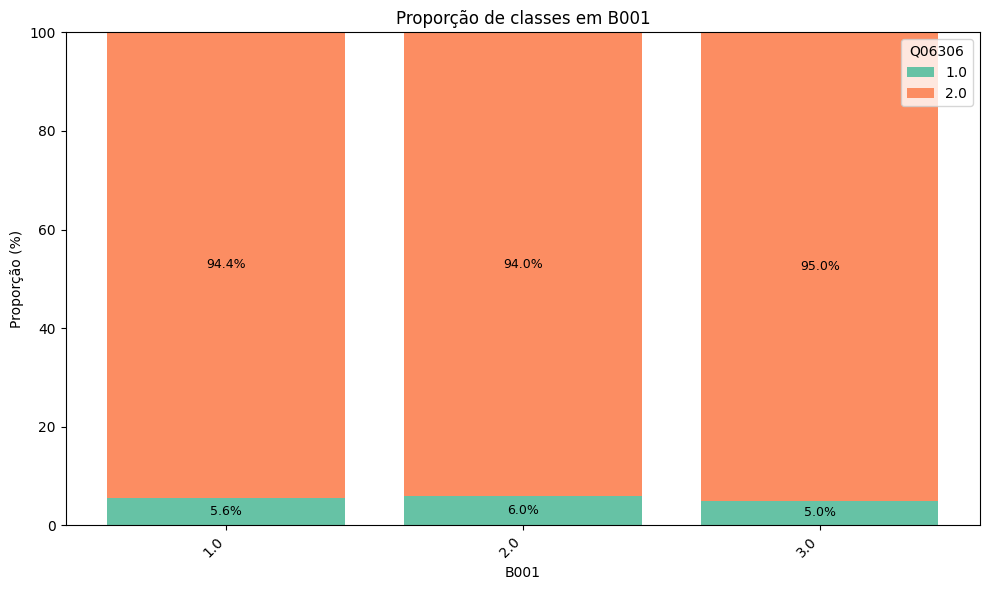

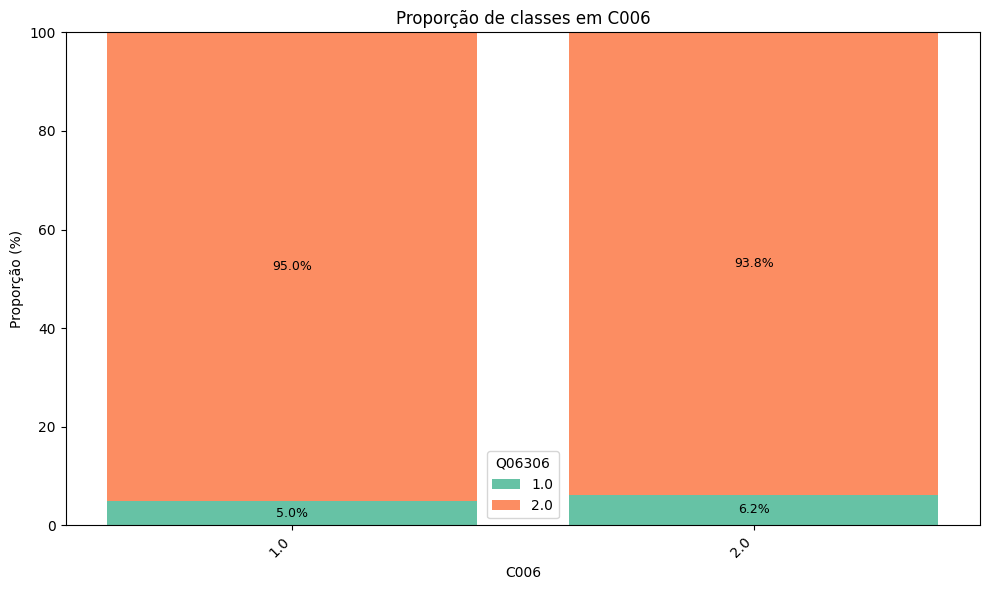

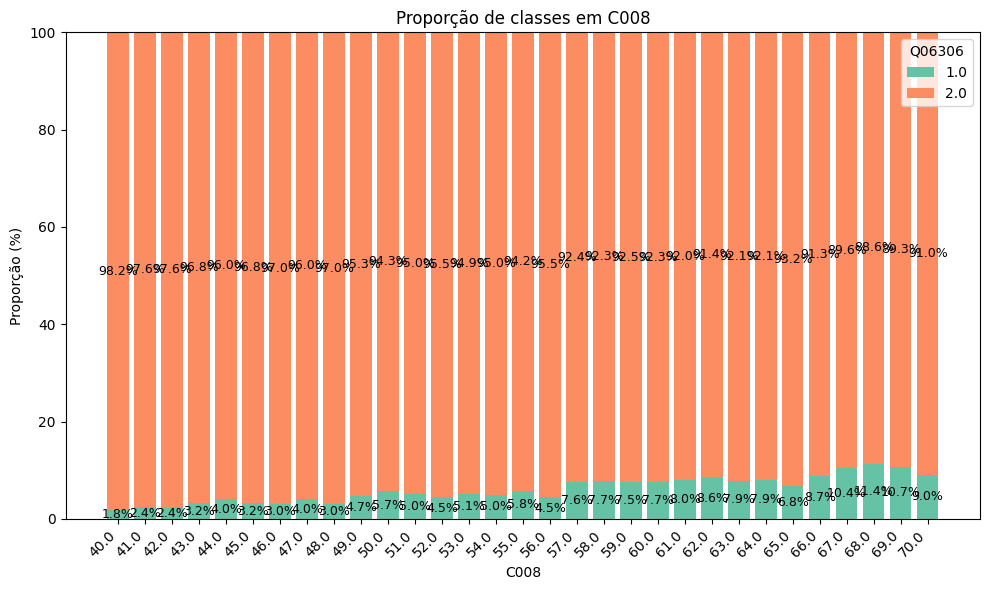

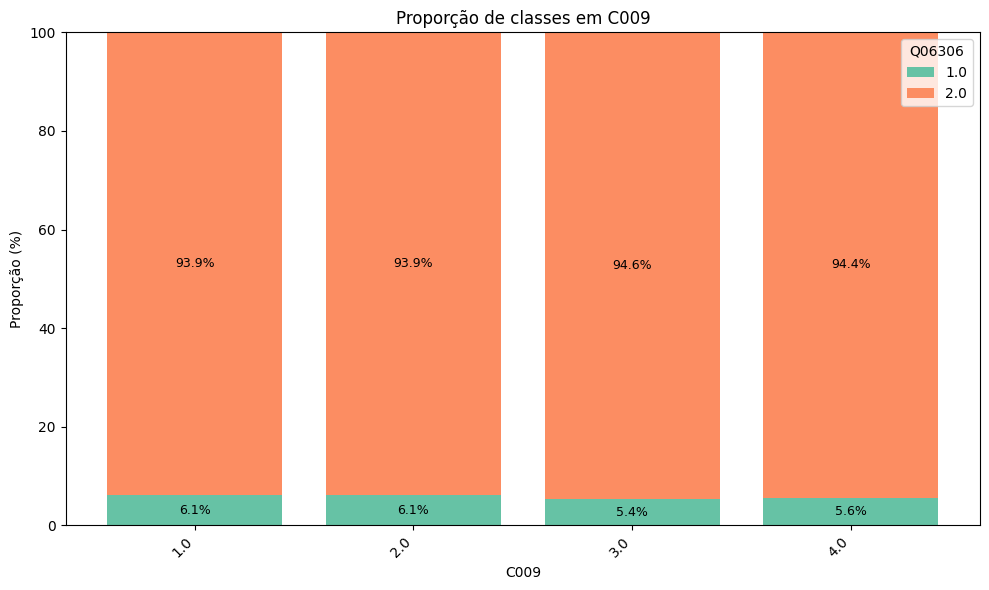

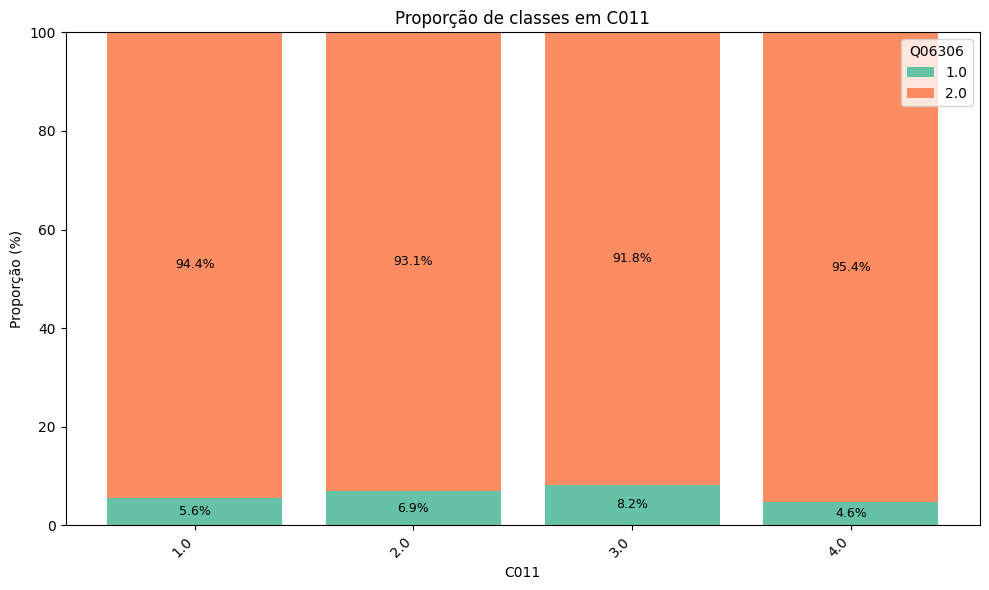

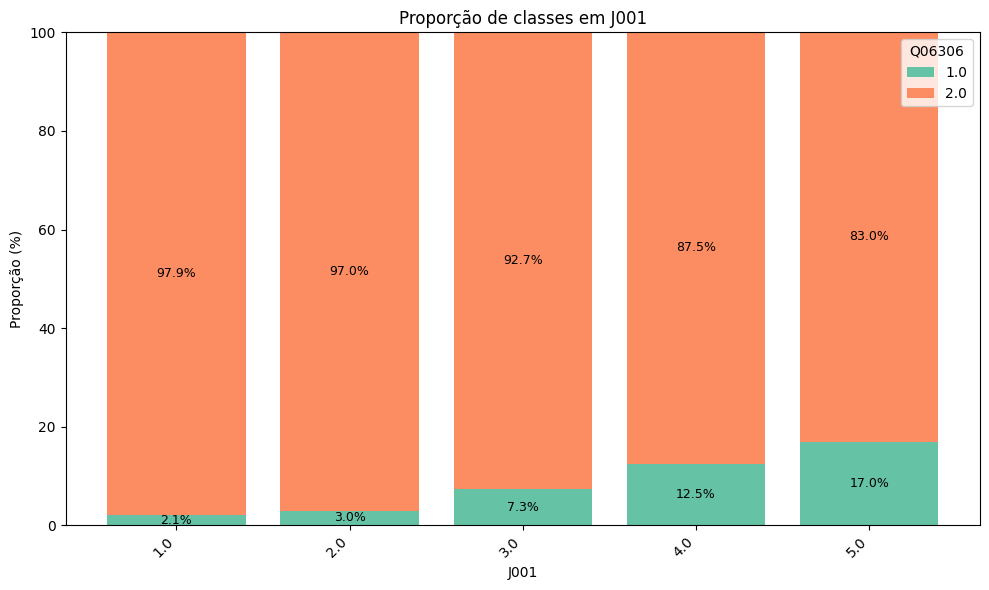

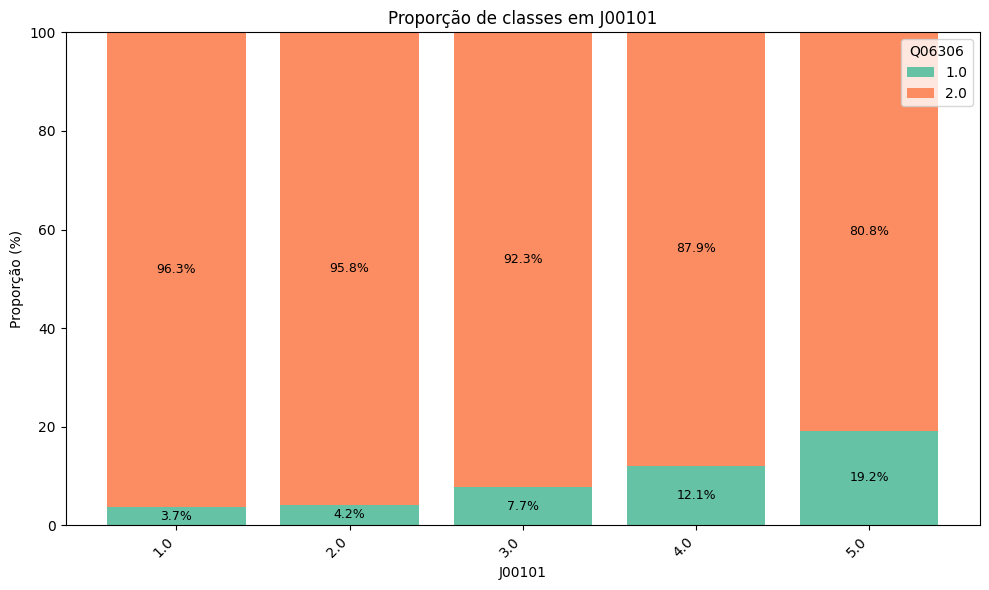

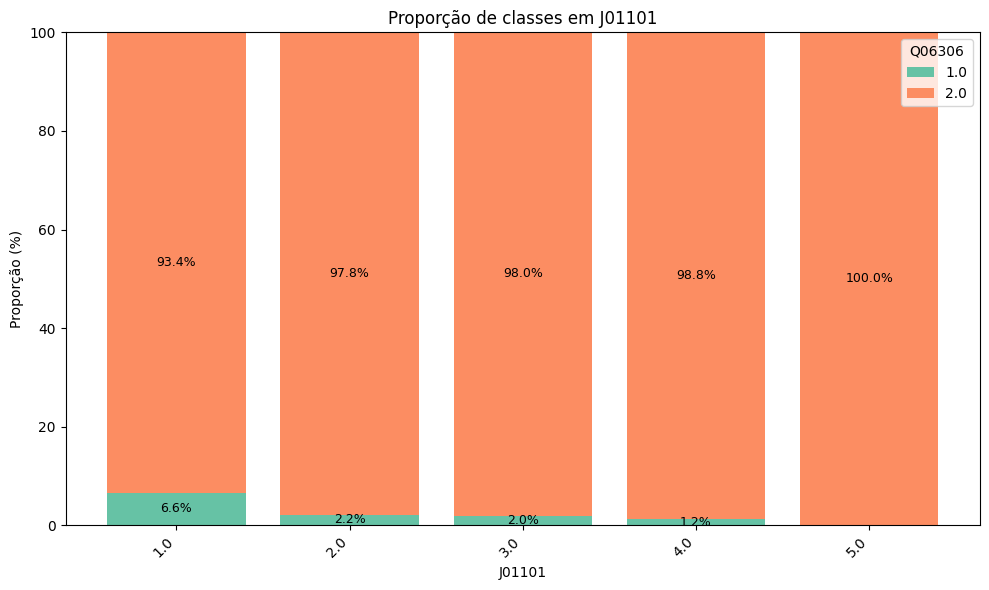

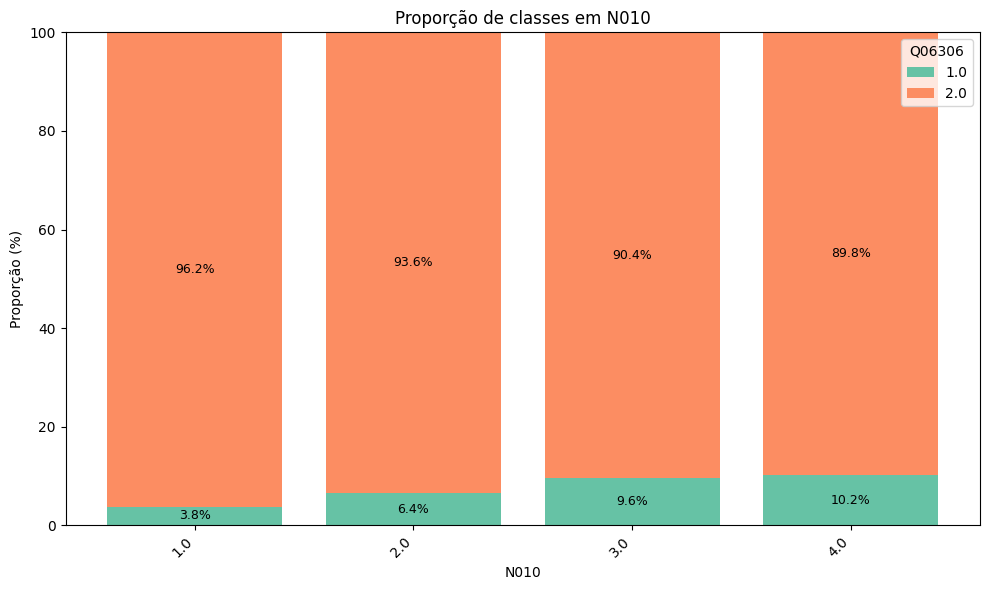

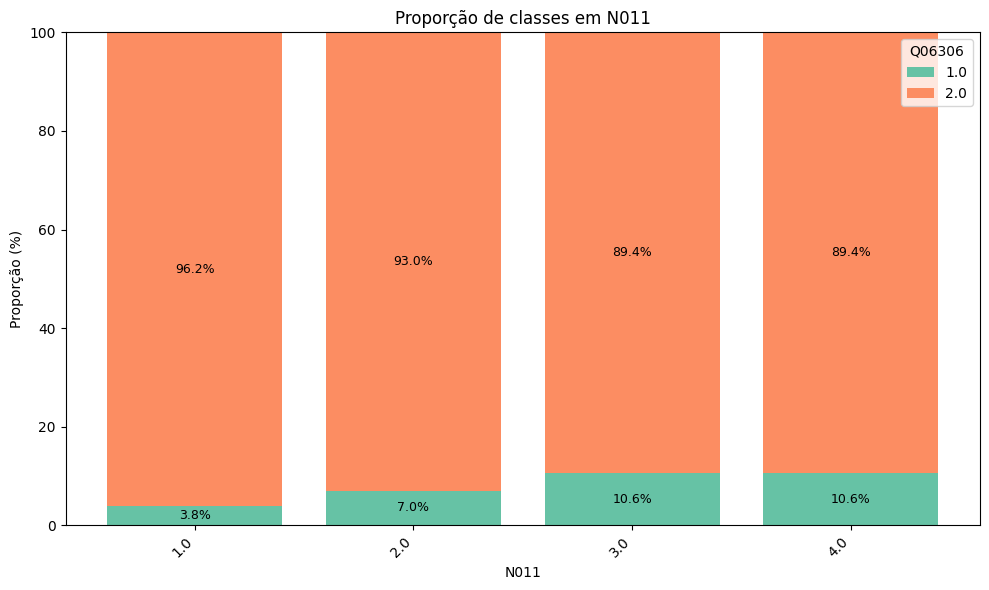

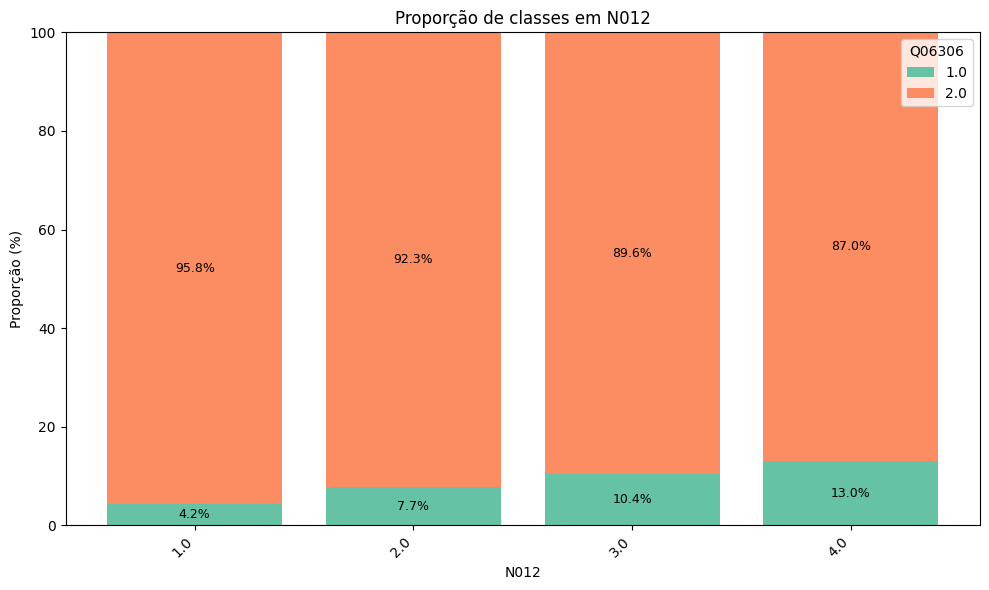

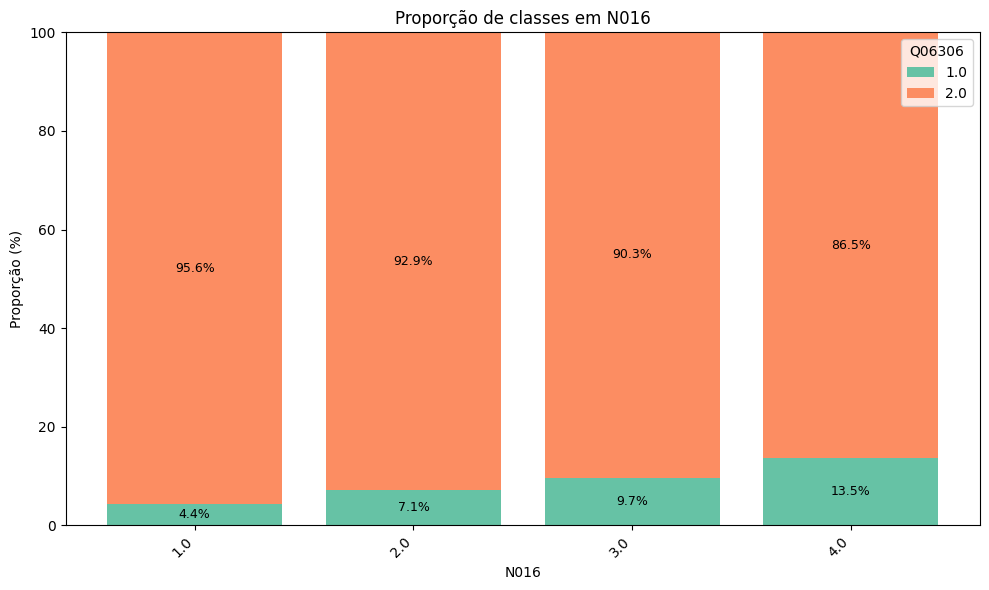

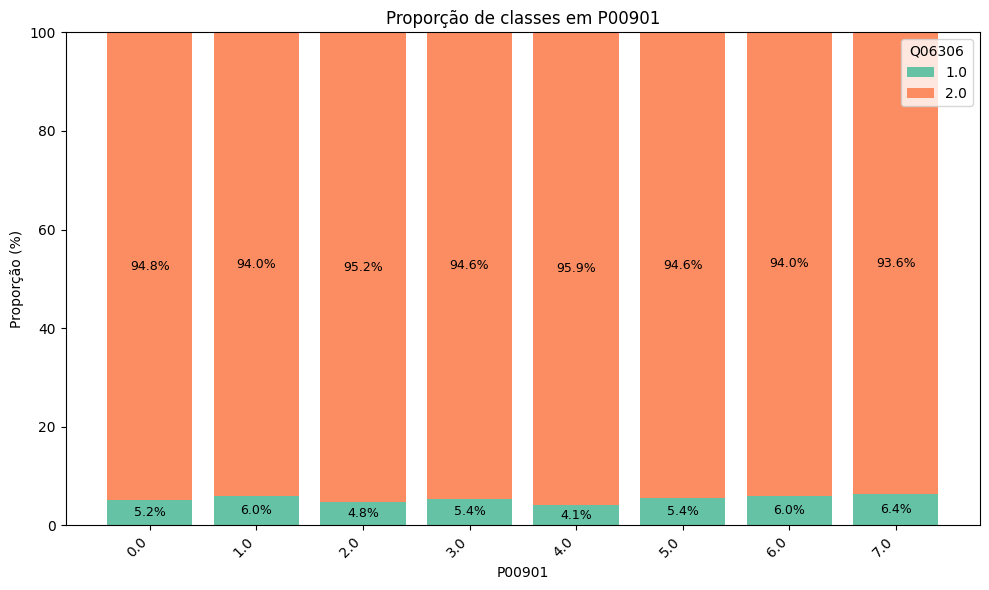

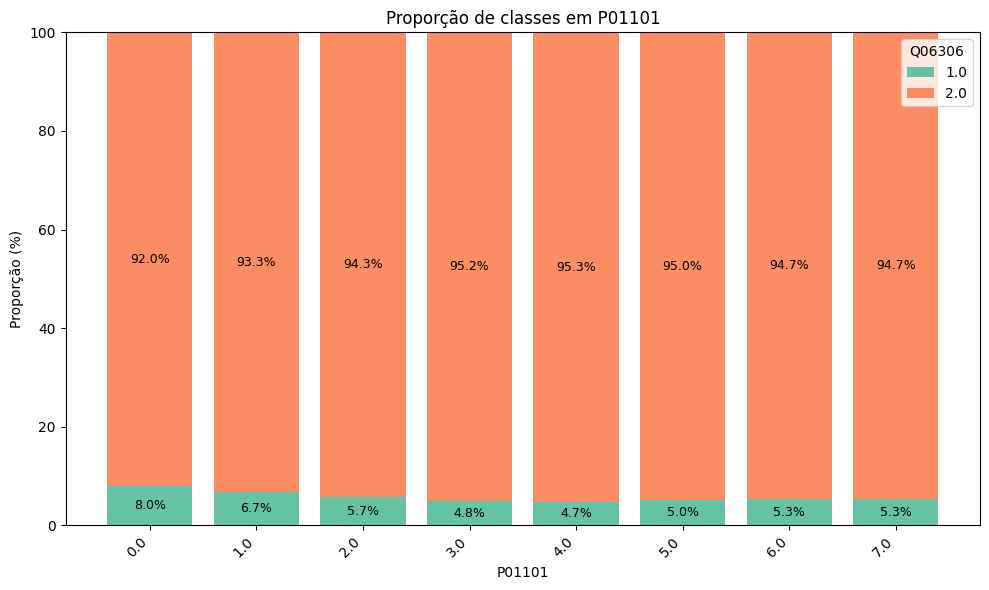

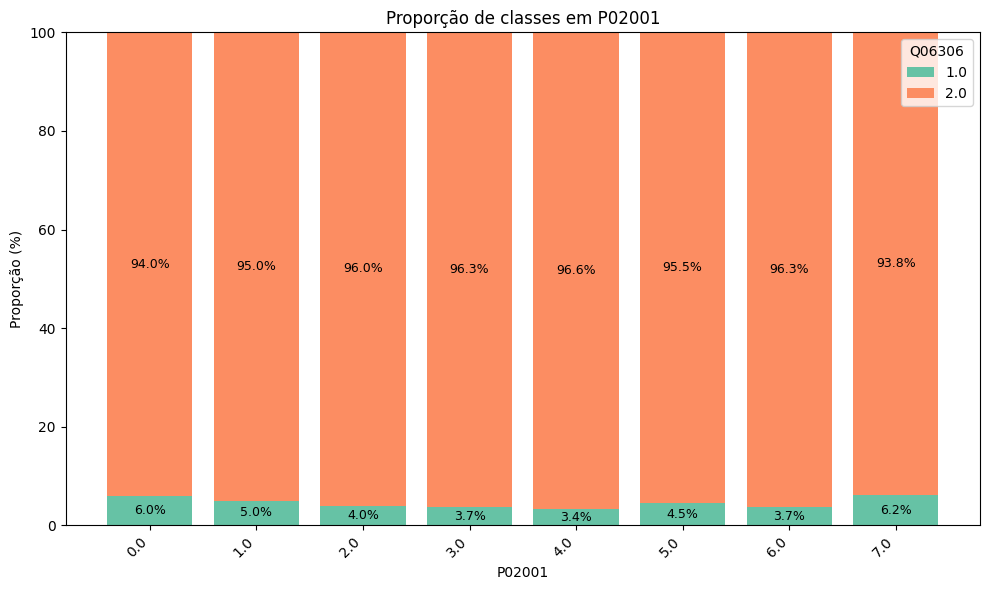

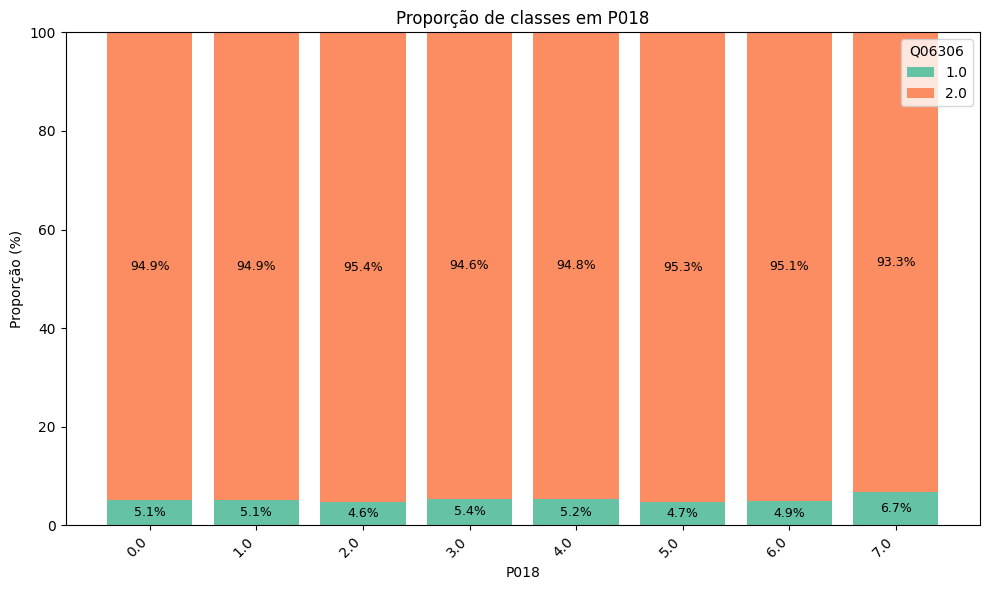

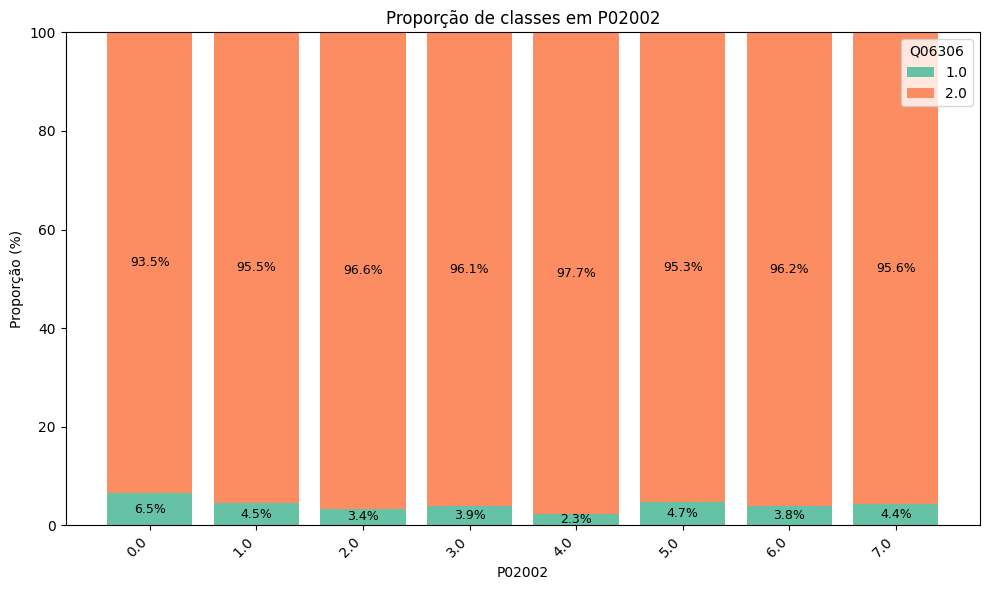

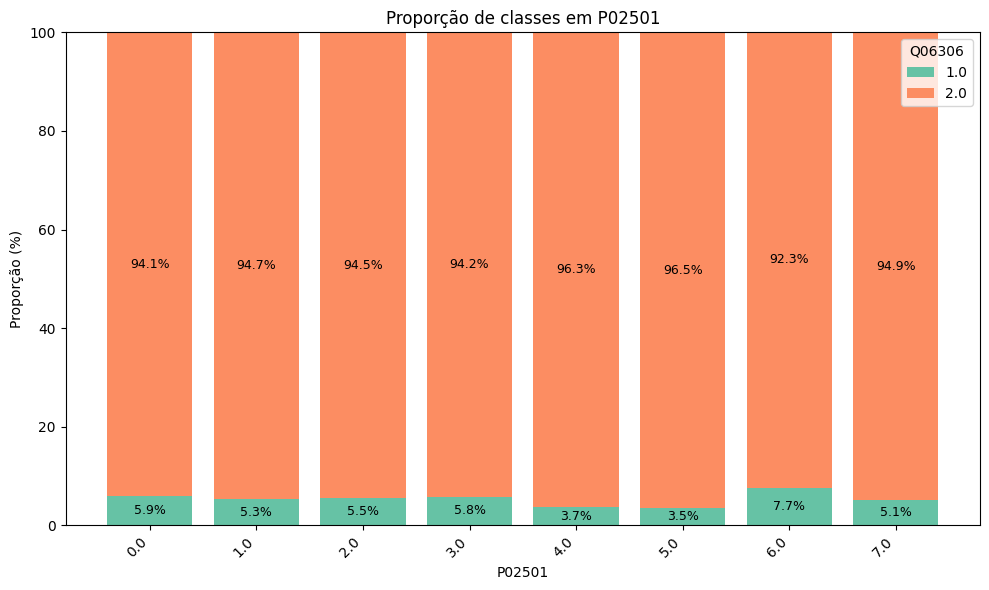

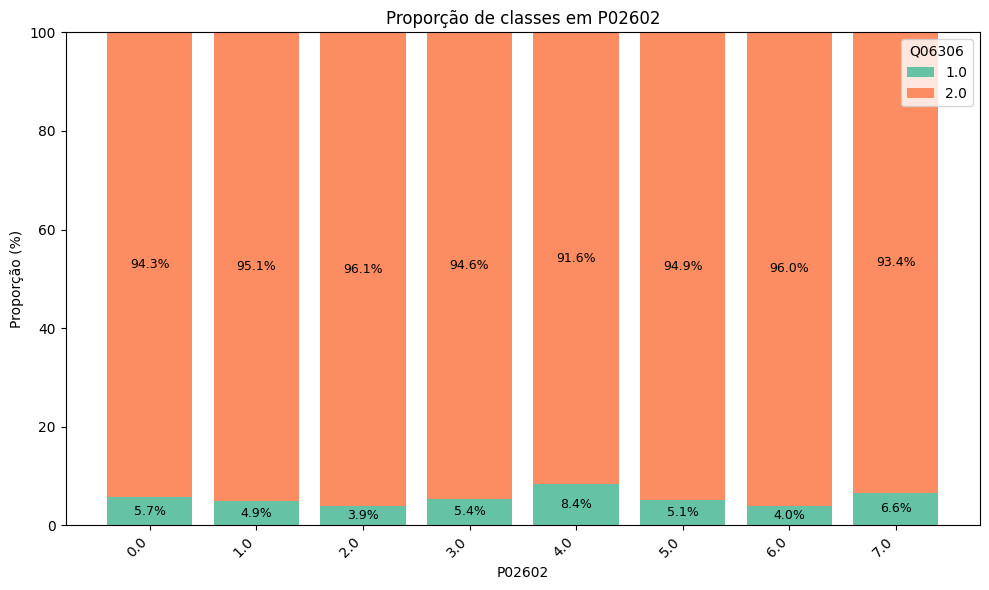

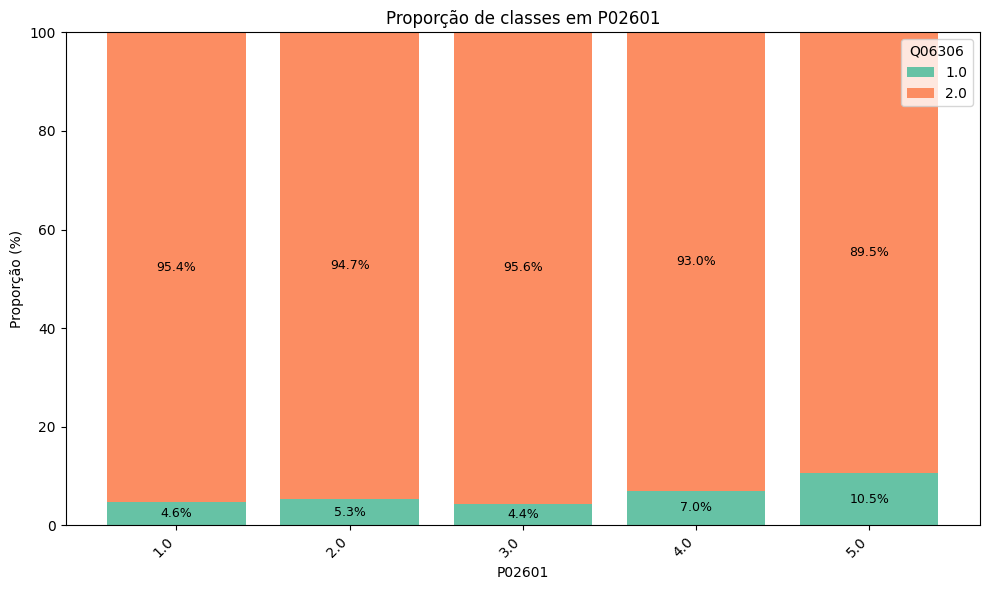

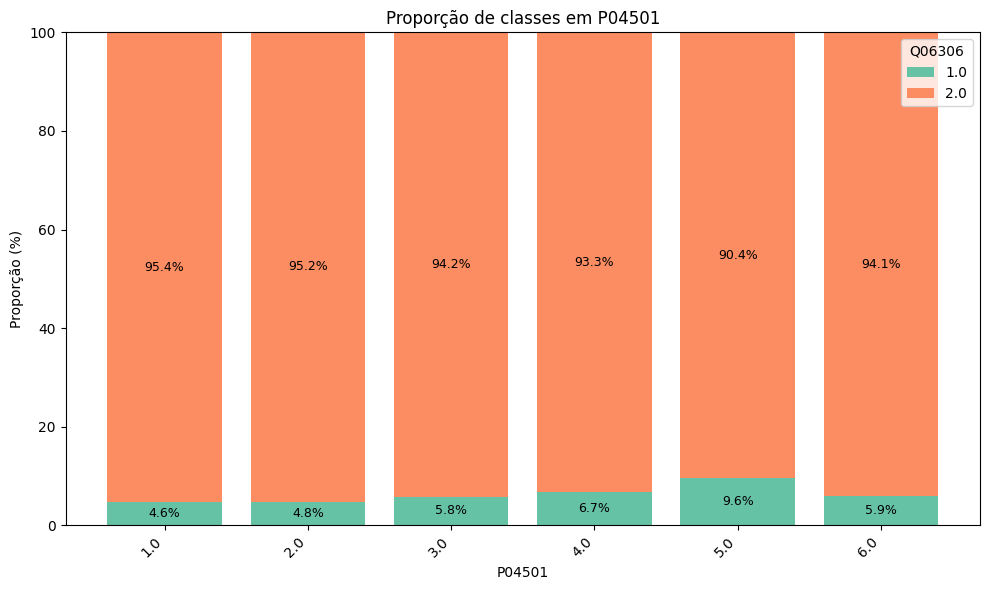

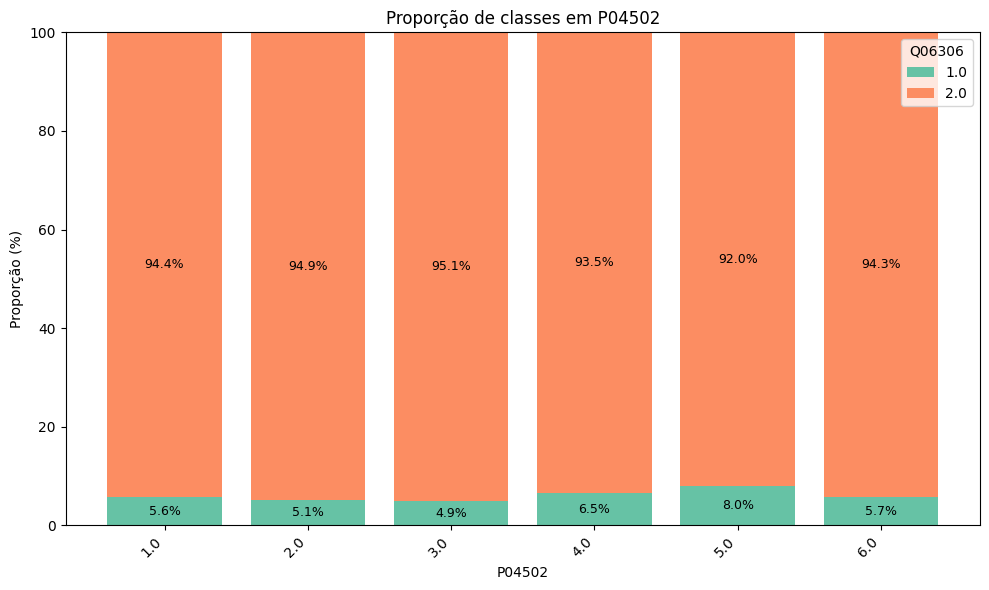

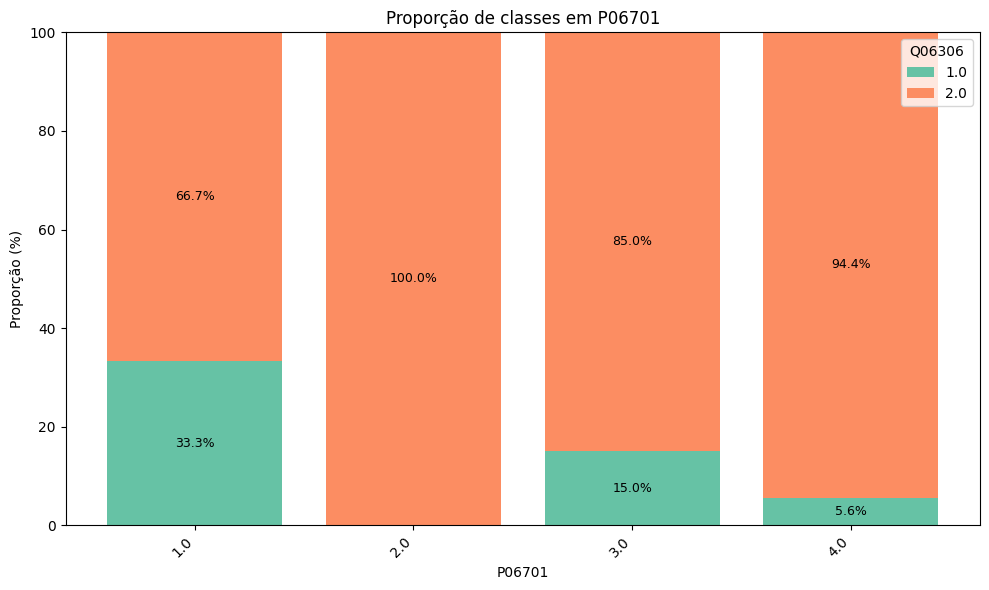

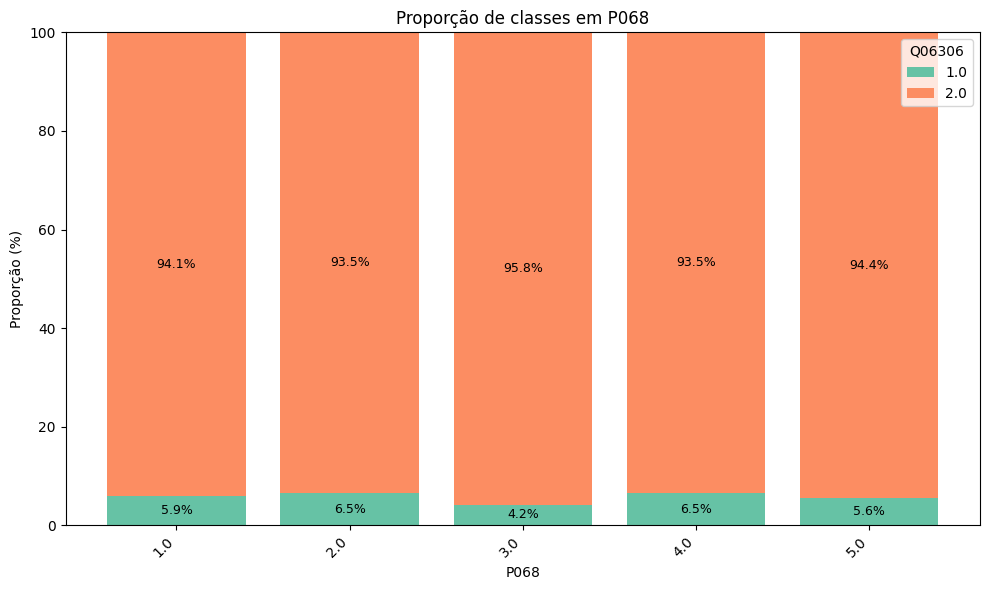

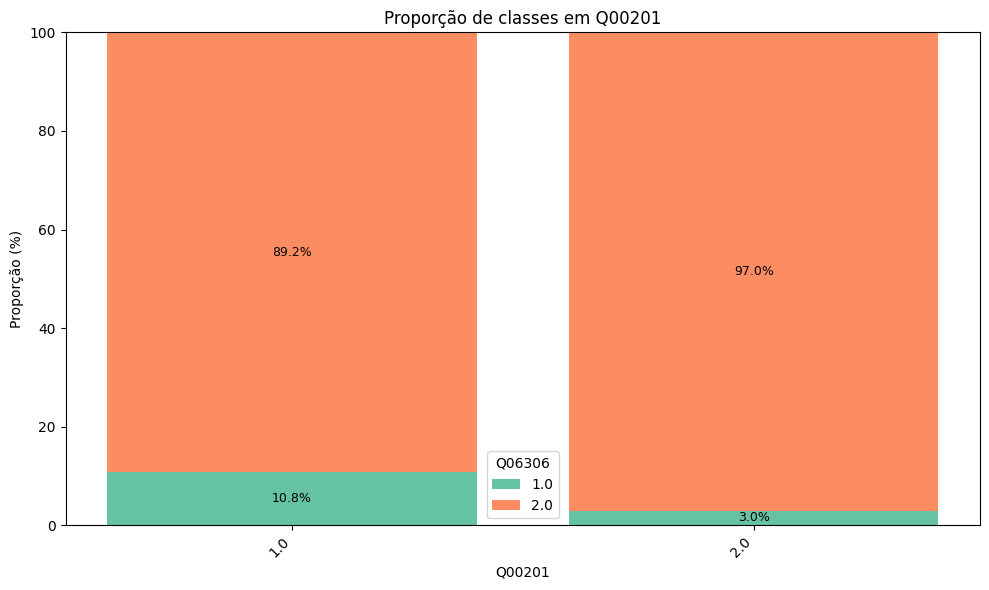

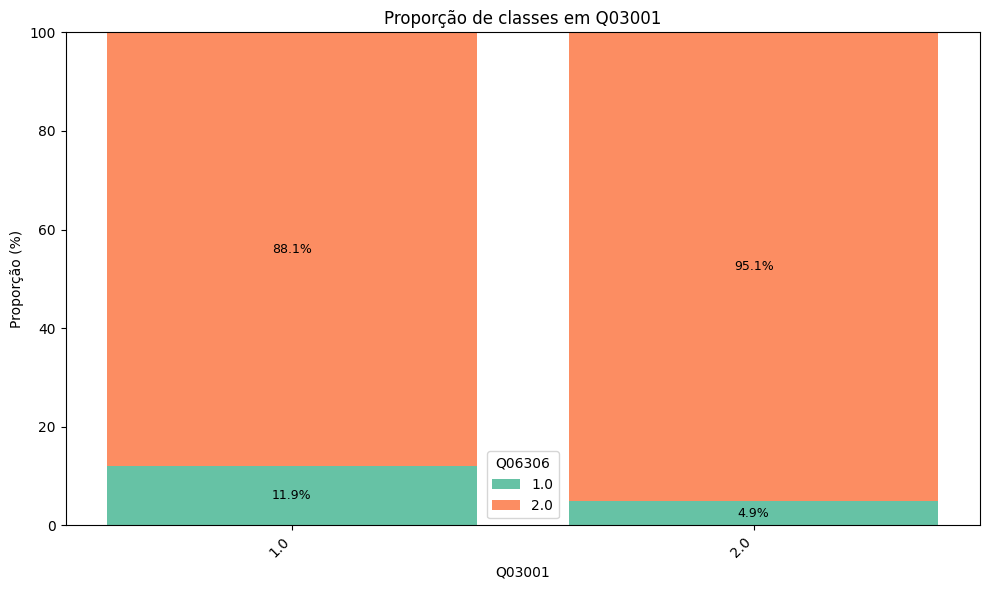

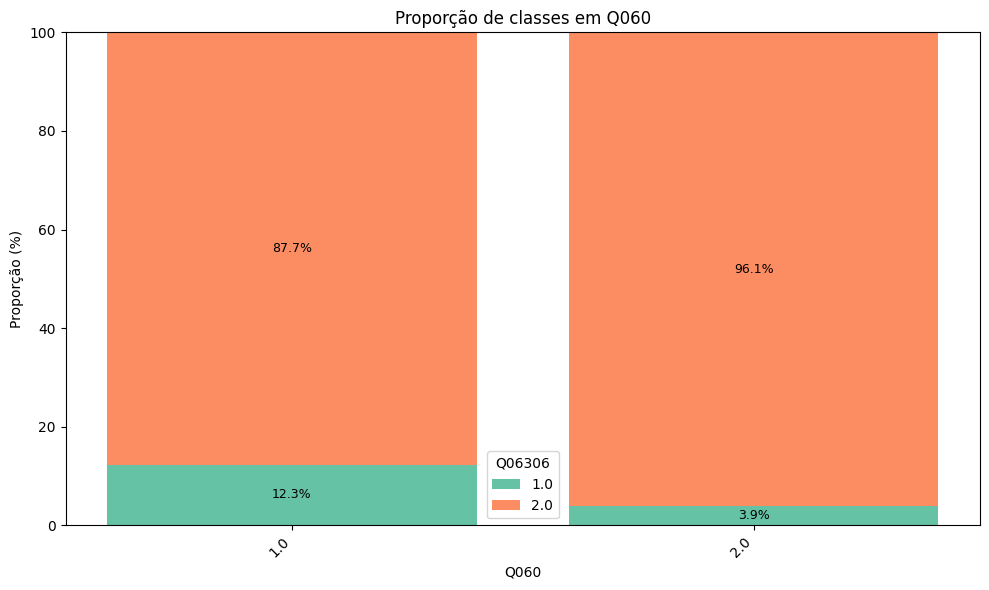

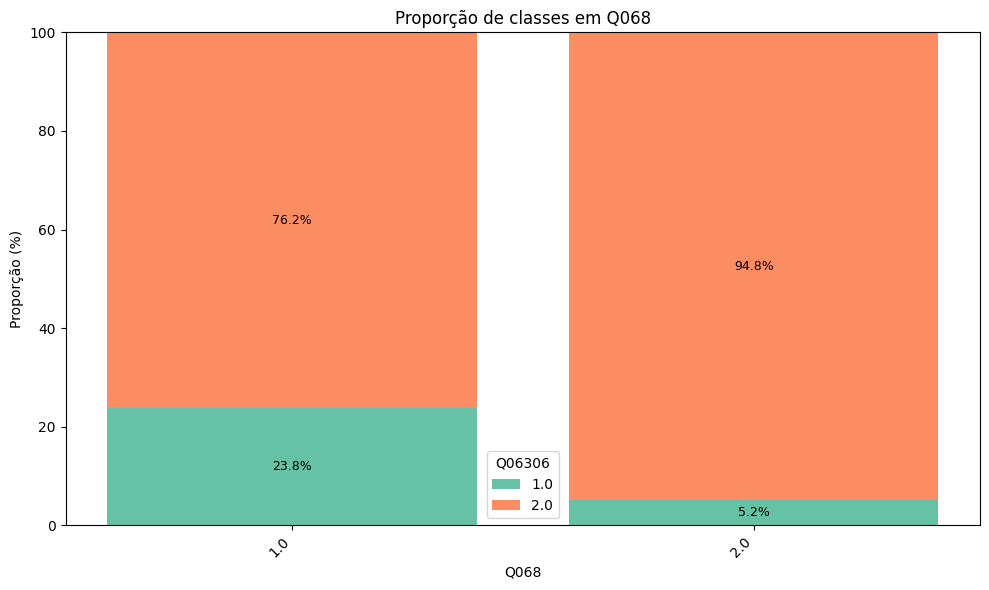

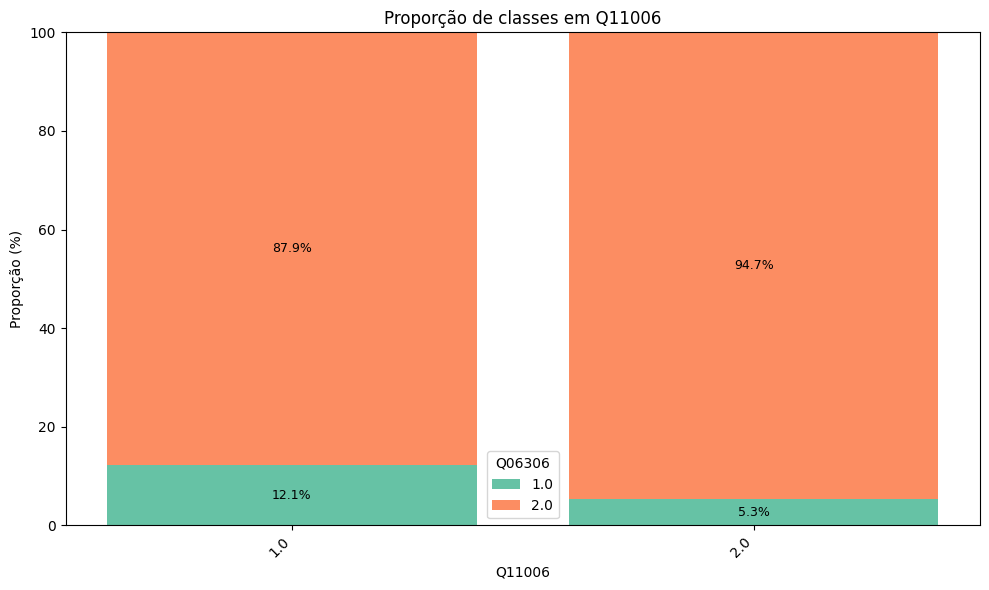

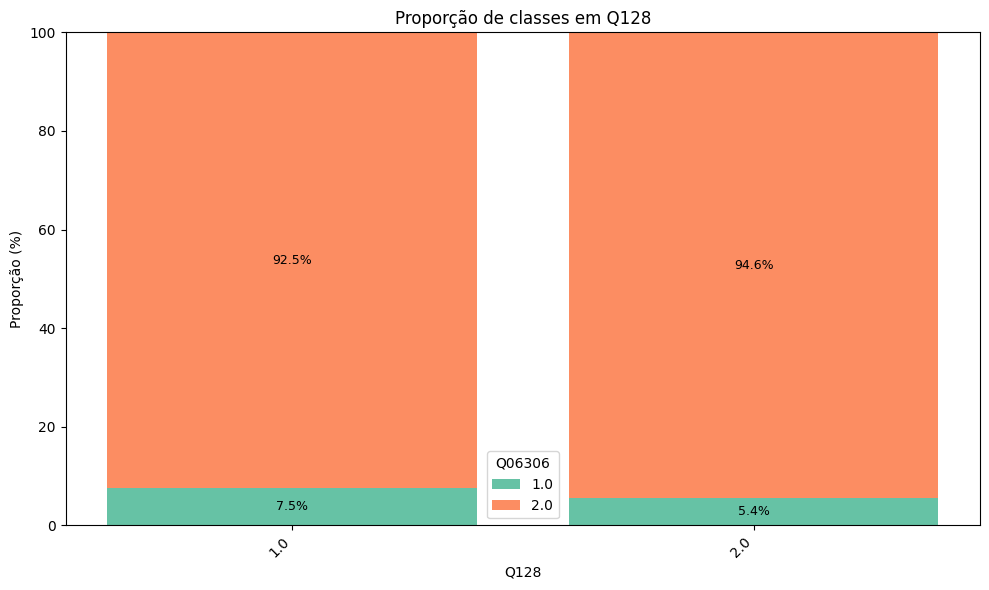

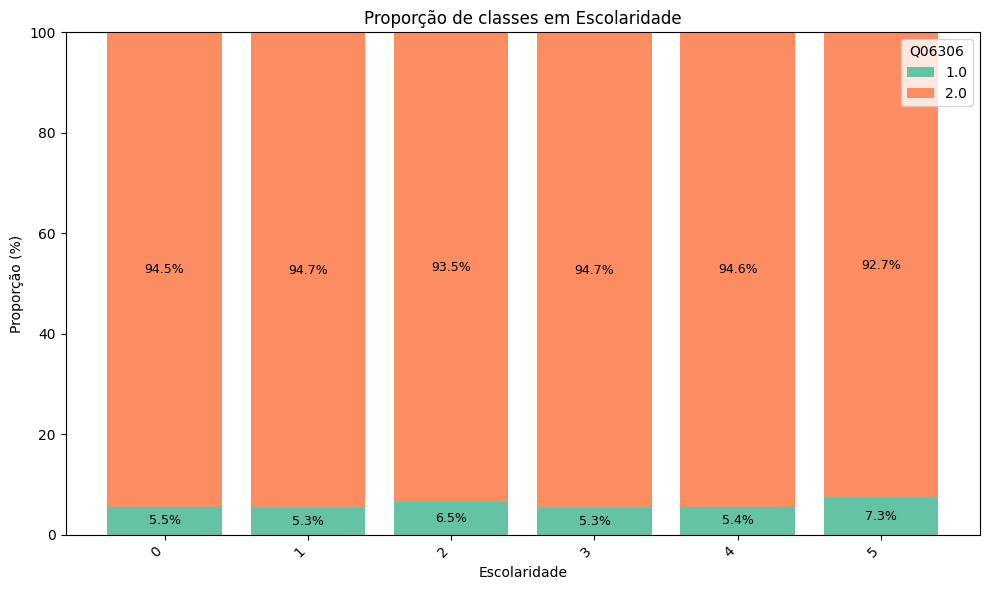

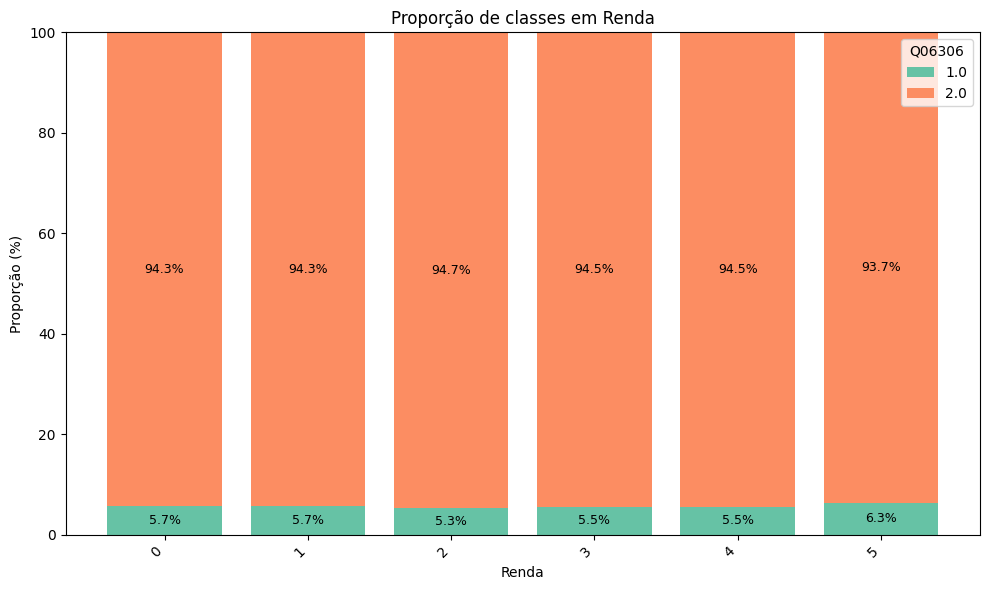

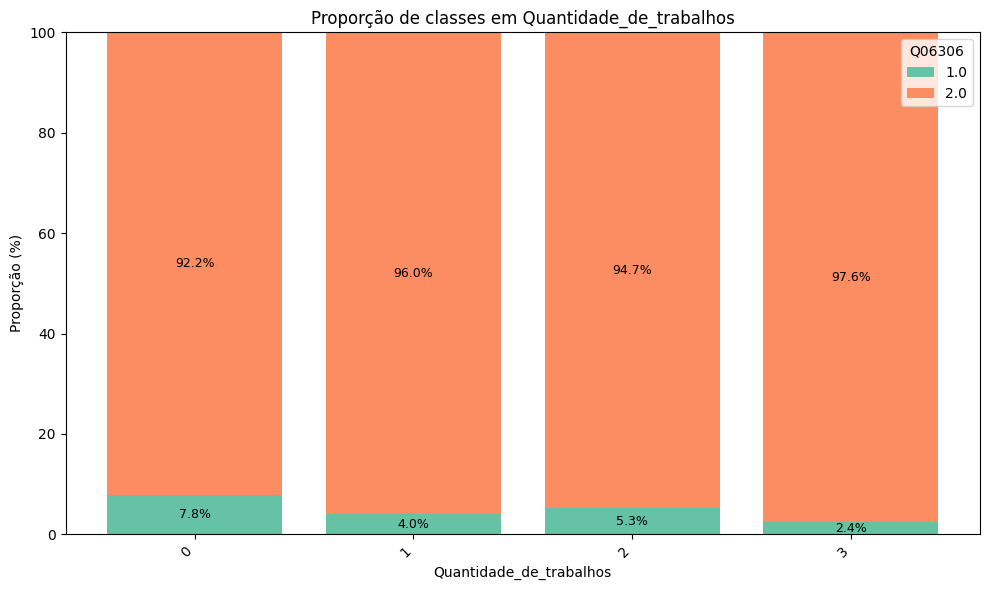

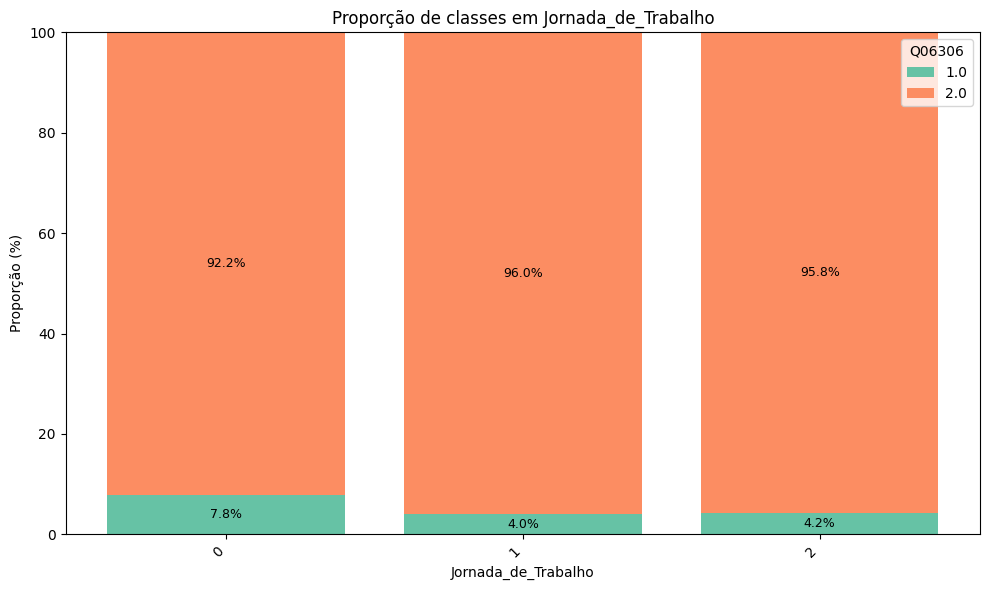

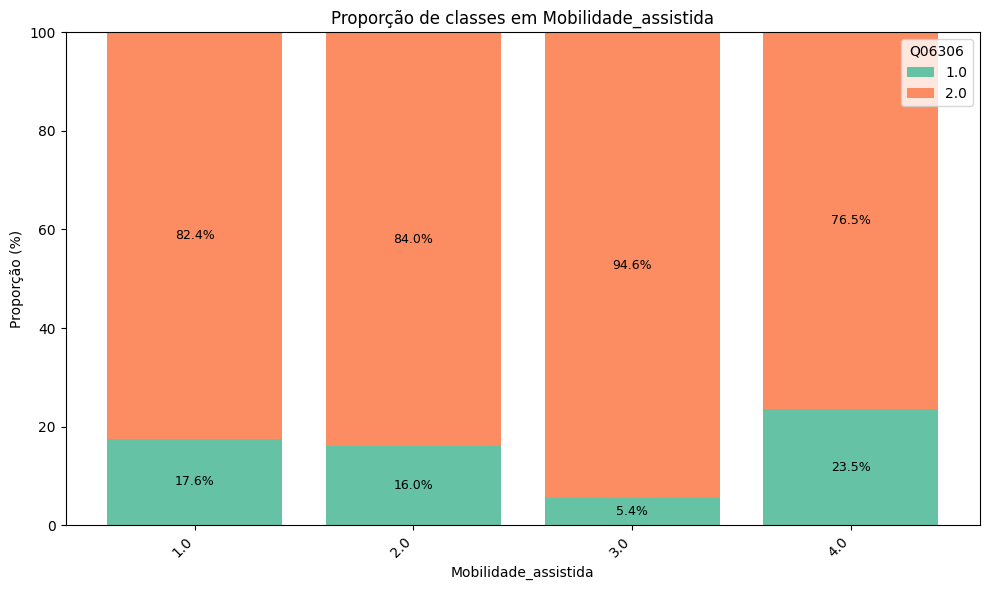

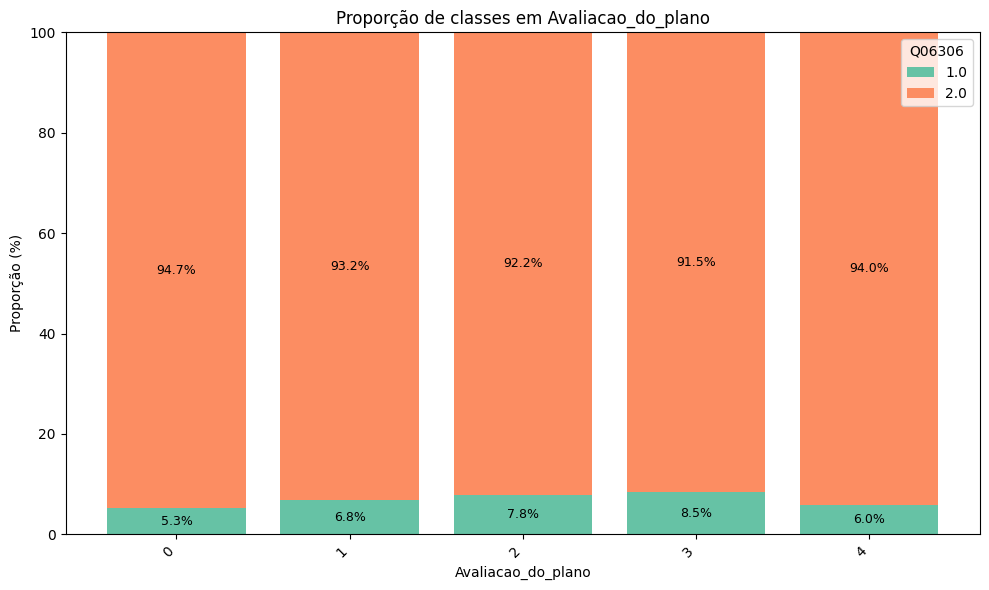

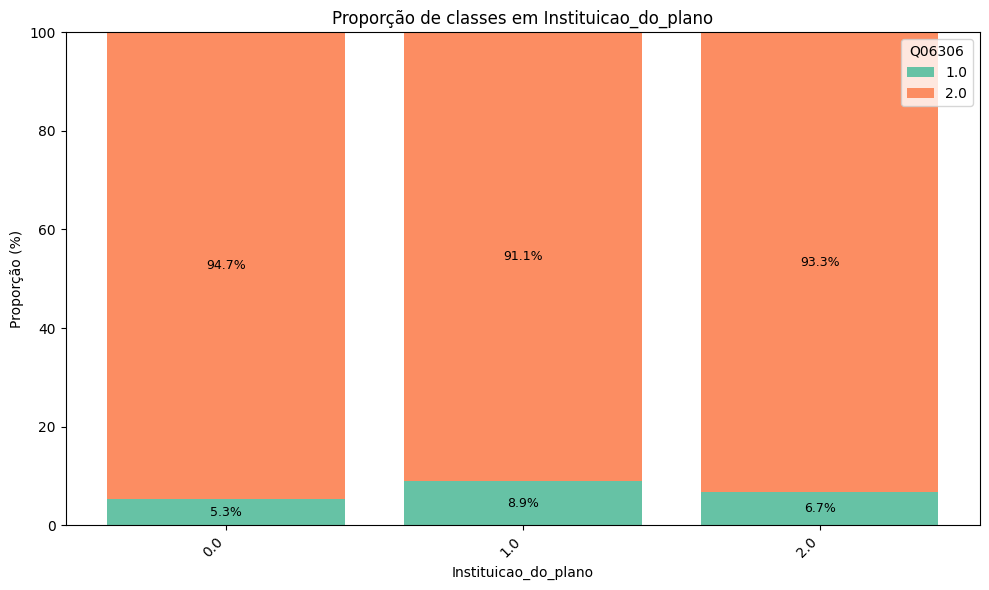

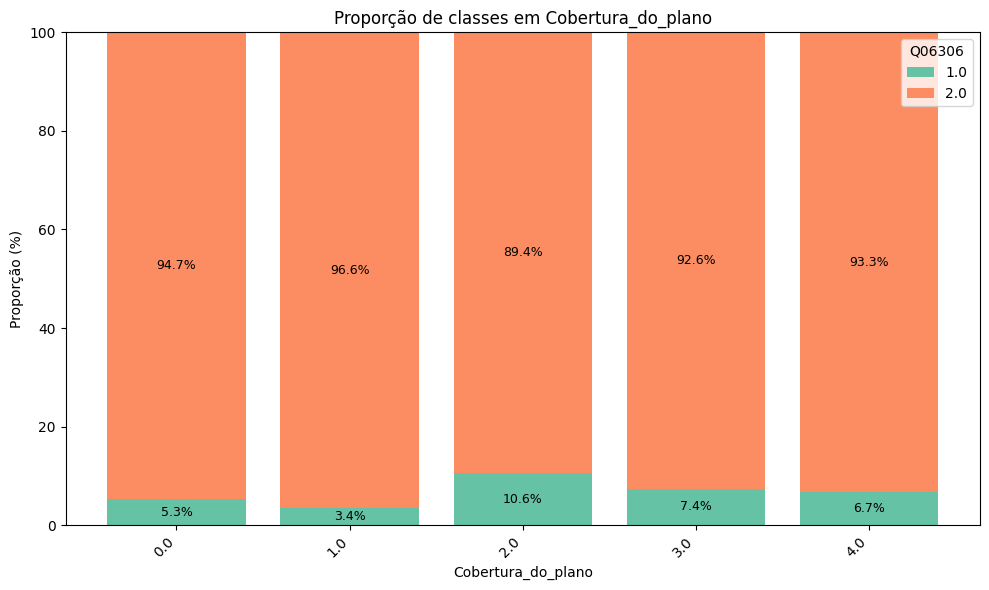

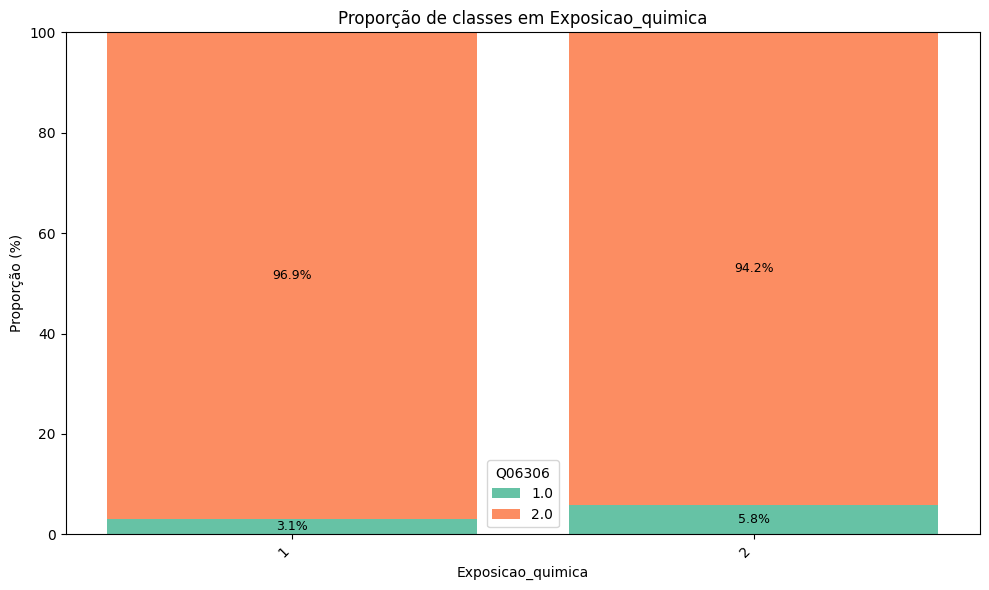

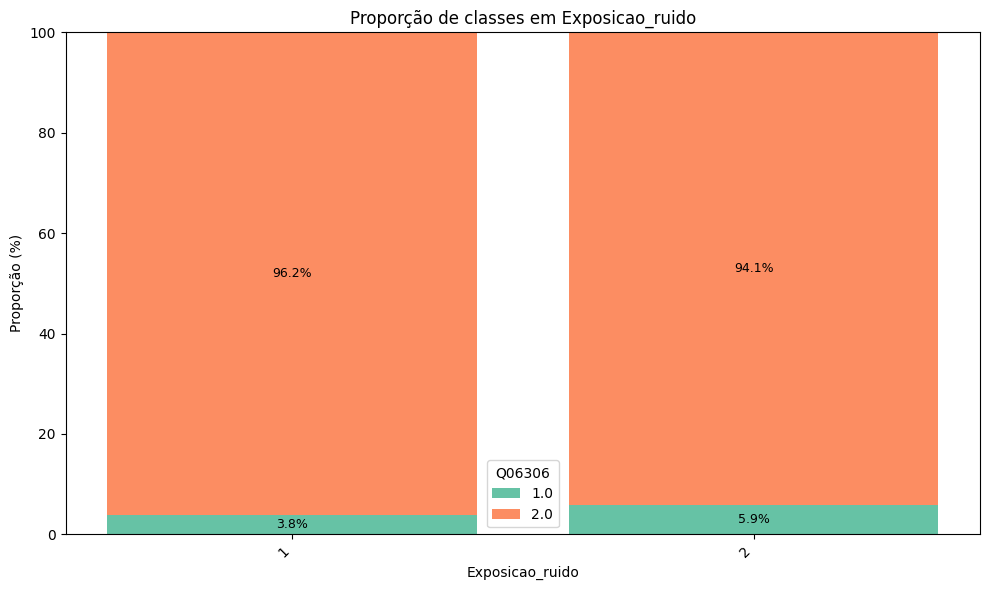

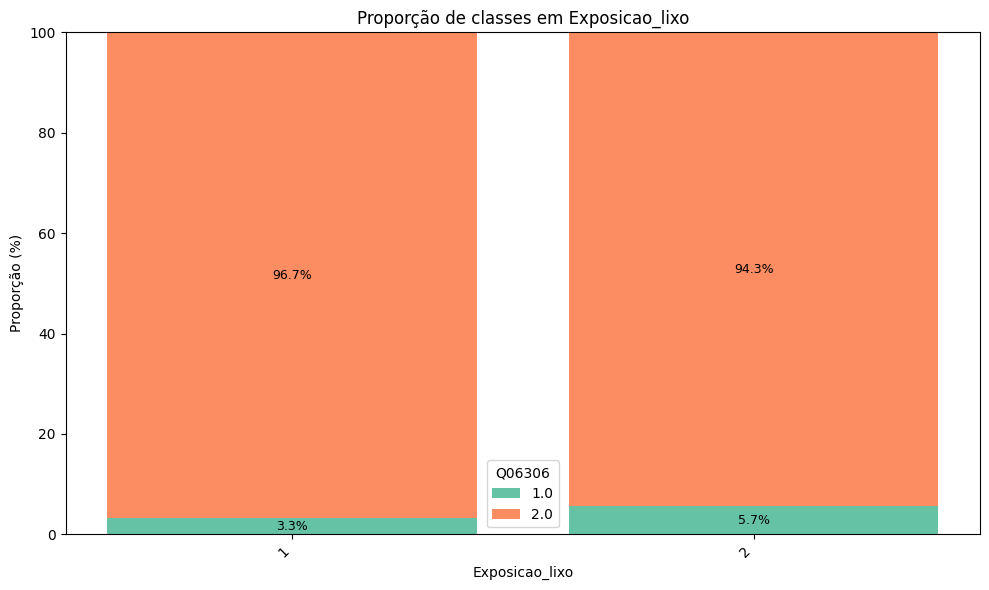

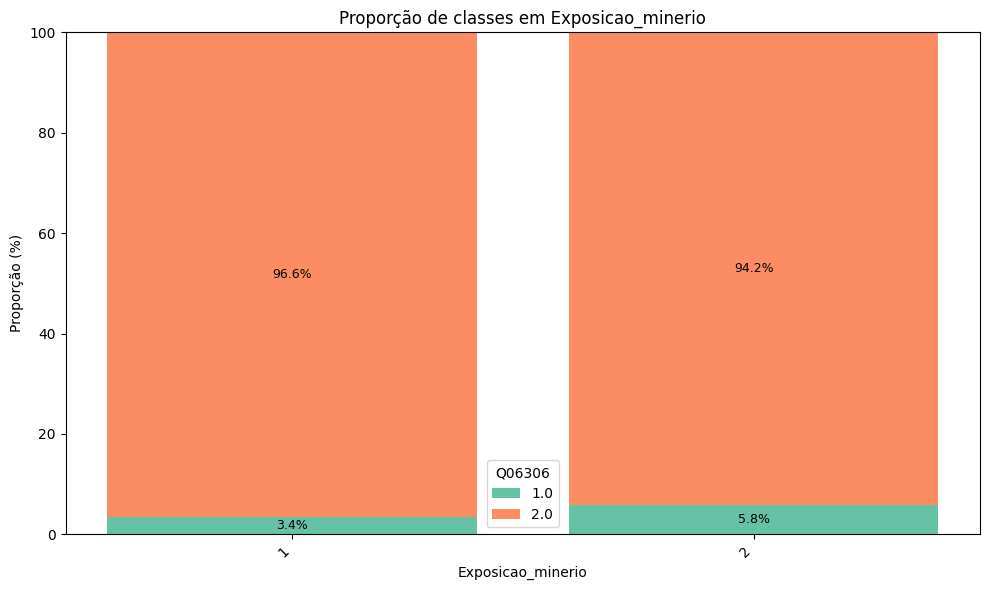

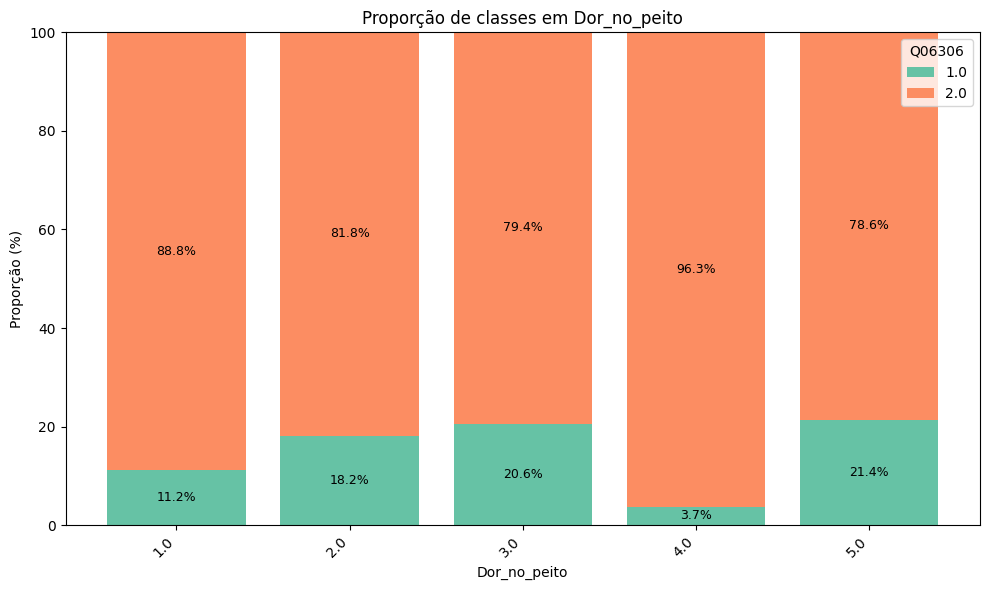

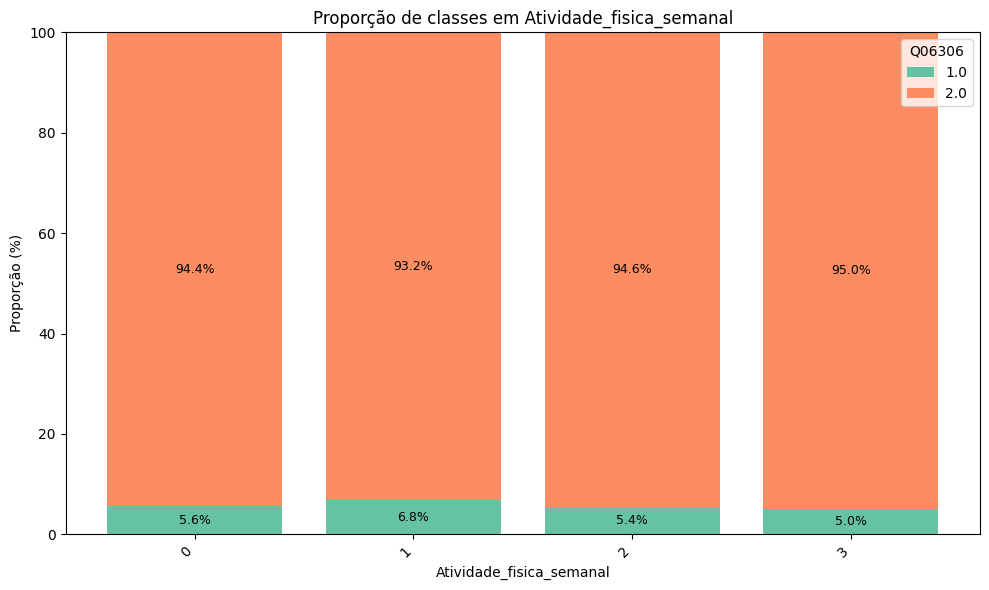

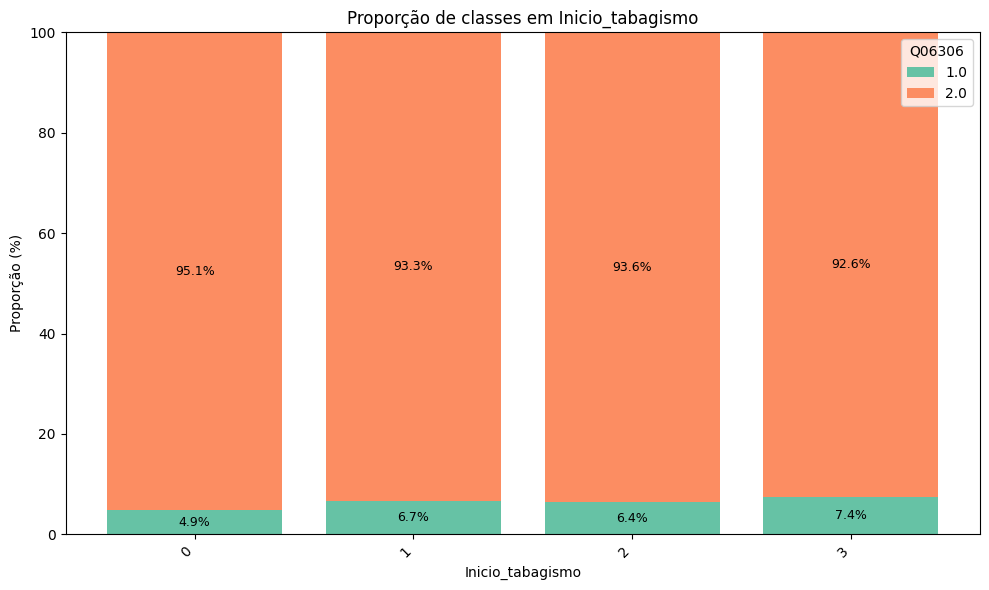

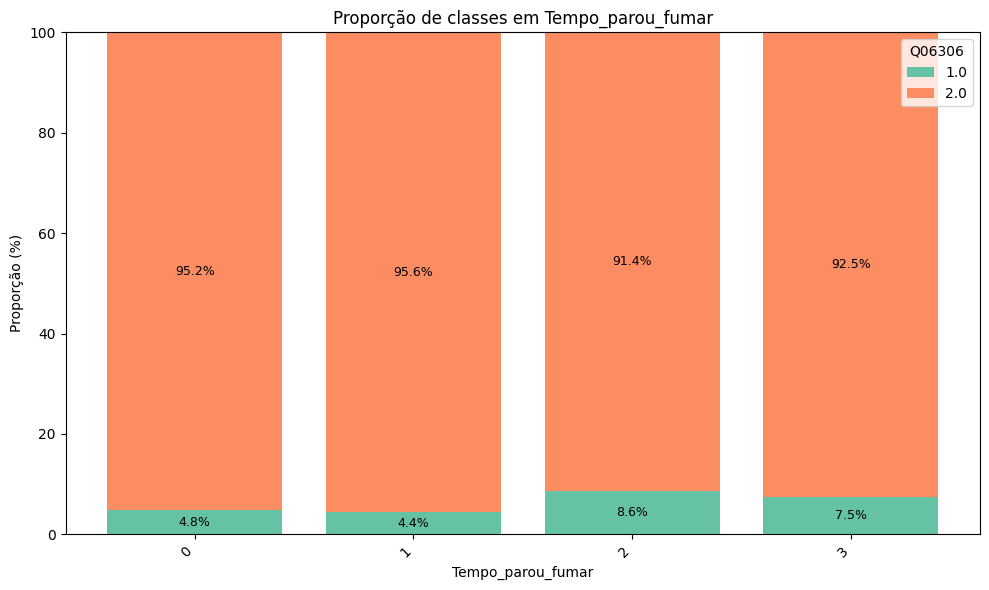

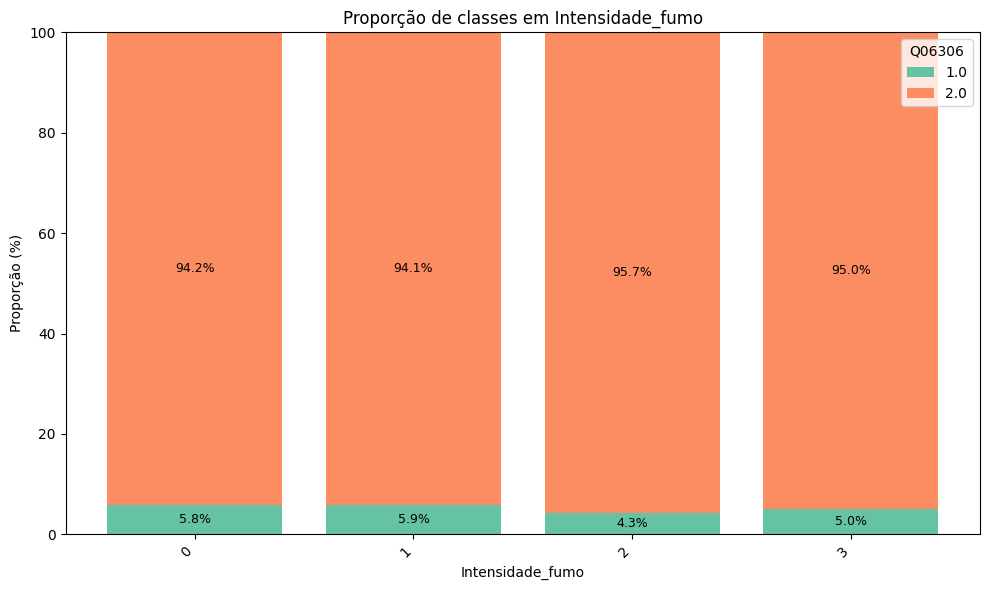

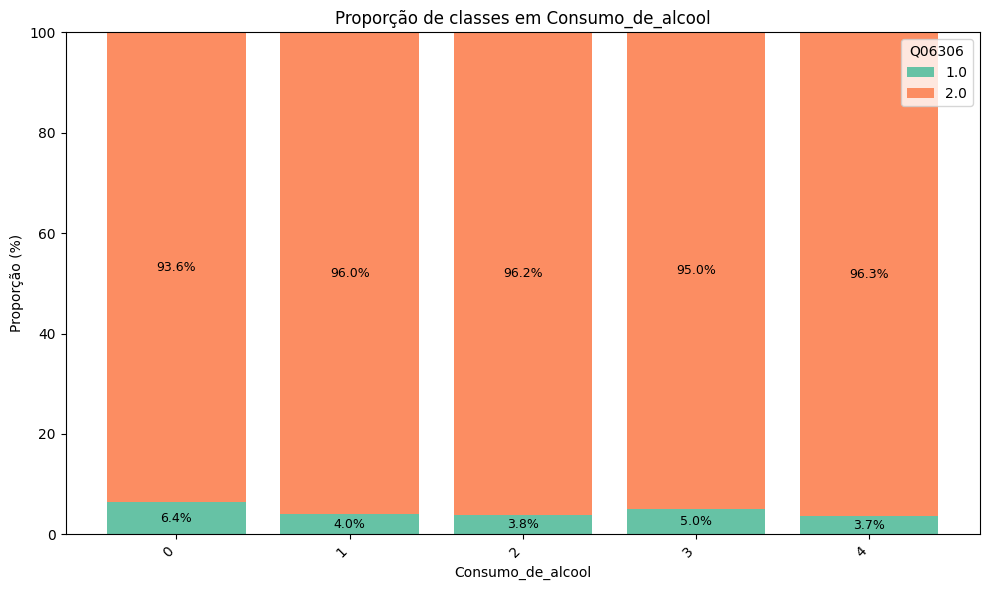

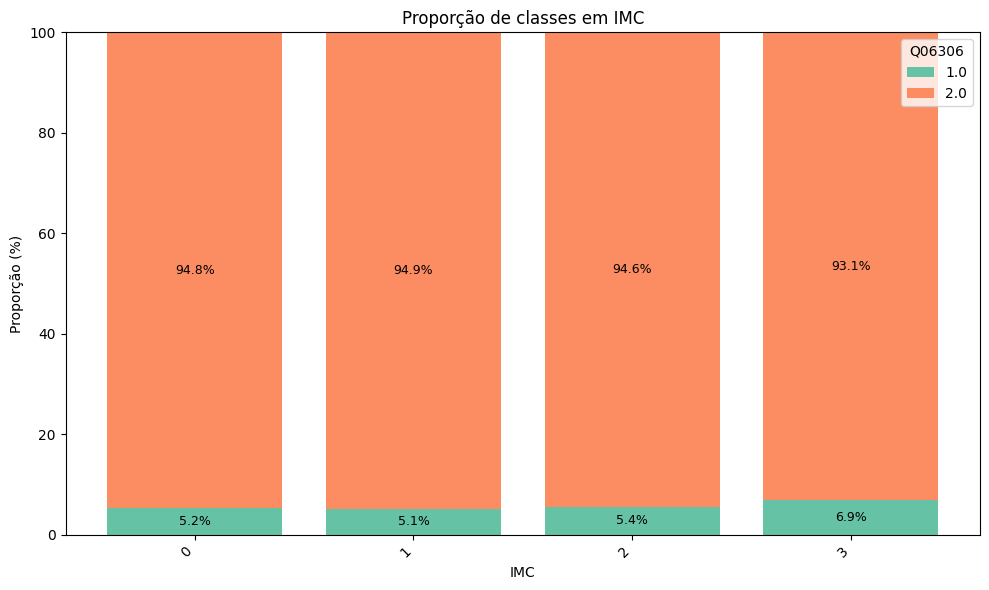

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminho para o CSV
caminho_arquivo = "../Bases/Criados/5_base_codificada.csv"
coluna_classe = "Q06306"

# Lê os dados
df = pd.read_csv(caminho_arquivo, dtype=str)

# Verifica a variável de classe
if coluna_classe not in df.columns:
    raise ValueError(f"A coluna '{coluna_classe}' não está presente na base.")

# Colunas categóricas (todas menos a de classe)
colunas = [col for col in df.columns if col != coluna_classe]

for col in colunas:
    # Calcula a contagem
    tabela = df.groupby([col, coluna_classe]).size().unstack(fill_value=0)

    # Converte para proporção
    proporcoes = tabela.div(tabela.sum(axis=1), axis=0) * 100

    # Plot
    plt.figure(figsize=(10, 6))
    bottom = pd.Series([0] * len(proporcoes), index=proporcoes.index)

    cores = plt.get_cmap('Set2').colors  # Paleta de cores
    for i, classe in enumerate(proporcoes.columns):
        plt.bar(proporcoes.index, proporcoes[classe], bottom=bottom, 
                label=classe, color=cores[i % len(cores)])
        
        # Adiciona os rótulos de porcentagem
        for j, valor in enumerate(proporcoes[classe]):
            if valor > 0:
                plt.text(j, bottom.iloc[j] + valor / 2, f'{valor:.1f}%', 
                         ha='center', va='center', fontsize=9, color='black')
        
        bottom += proporcoes[classe]

    plt.title(f'Proporção de classes em {col}')
    plt.ylabel('Proporção (%)')
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 100)
    plt.legend(title=coluna_classe)
    plt.tight_layout()
    plt.show()

In [14]:
df.columns

Index(['V0001', 'V0026', 'V0031', 'B001', 'C006', 'C008', 'C009', 'C011',
       'J001', 'J00101', 'J01101', 'N010', 'N011', 'N012', 'N016', 'P00901',
       'P01101', 'P02001', 'P018', 'P02002', 'P02501', 'P02602', 'P02601',
       'P04501', 'P04502', 'P06701', 'P068', 'Q00201', 'Q03001', 'Q060',
       'Q06306', 'Q068', 'Q11006', 'Q128', 'Escolaridade', 'Renda',
       'Quantidade_de_trabalhos', 'Jornada_de_Trabalho',
       'Mobilidade_assistida', 'Avaliacao_do_plano', 'Instituicao_do_plano',
       'Cobertura_do_plano', 'Exposicao_quimica', 'Exposicao_ruido',
       'Exposicao_lixo', 'Exposicao_minerio', 'Dor_no_peito',
       'Atividade_fisica_semanal', 'Inicio_tabagismo', 'Tempo_parou_fumar',
       'Intensidade_fumo', 'Consumo_de_alcool', 'IMC'],
      dtype='object')